In [1]:
import KID_model_functions as kids
import fitting_KID_model_functions as fitkids
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from scipy.optimize import curve_fit
from astropy import units as u, constants as c
from glob import glob

In [2]:
save=False
plotlabel='fitting-masktrans_etaopt_evenmoredata_unbounded_residuals'
#trans = 0.03

In [3]:
res = 0

In [4]:
# CD010 and CD013: full optical, no OD mask
cd010file = 'optical_response_evap_devices/CD010_reduced_Res'+str(res)+'.csv'
cd013file = 'optical_response_evap_devices/CD013_reduced_Res'+str(res)+'.csv'
TBBoptdata10,f0optdata10,xoptdata10,sxxoptdata10 = np.loadtxt(cd010file,delimiter=',',unpack=True)
TBBoptdata13,f0optdata13,xoptdata13,sxxoptdata13 = np.loadtxt(cd013file,delimiter=',',unpack=True)
TBBfulloptdata = np.hstack((TBBoptdata10,TBBoptdata13))
f0fulloptdata = np.hstack((f0optdata10,f0optdata13))
xfulloptdata = np.hstack((xoptdata10,xoptdata13))
sxxfulloptdata = np.hstack((sxxoptdata10,sxxoptdata13))

TBBfulloptpts = np.sort(list(set(TBBfulloptdata)))
f0fulloptpts = []
f0fullopterr = []
xfulloptpts = []
xfullopterr = []
sxxfulloptpts = []
sxxfullopterr = []

ix = np.where(kids.TBB_to_Pinc(TBBfulloptpts)<1*u.pW)
for temp in TBBfulloptpts[ix]:
    inds = np.where(TBBfulloptdata == temp)
    
    f0fulloptpts.append(np.average(f0fulloptdata[inds]))
    f0fullopterr.append(np.std(f0fulloptdata[inds])/np.sqrt(len(inds)))
    
    xfulloptpts.append(np.average(xfulloptdata[inds]))
    xfullopterr.append(np.std(xfulloptdata[inds])/np.sqrt(len(inds)))
    
    sxxfulloptpts.append(np.average(sxxfulloptdata[inds]))
    sxxfullopterr.append(np.std(sxxfulloptdata[inds])/np.sqrt(len(inds)))
    
TBBfulloptpts = TBBfulloptpts[ix]

In [5]:
f0fulloptpts10 = []
f0fullopterr10 = []
xfulloptpts10 = []
xfullopterr10 = []
TBBoptpts10 = np.sort(list(set(TBBoptdata10)))
iy = np.where(kids.TBB_to_Pinc(TBBoptpts10)<1*u.pW)
for temp in TBBoptpts10[iy]:
    inds = np.where(TBBoptdata10 == temp)
    
    f0fulloptpts10.append(np.average(f0optdata10[inds]))
    f0fullopterr10.append(np.std(f0optdata10[inds])/np.sqrt(len(inds)))
    
    xfulloptpts10.append(np.average(xoptdata10[inds]))
    xfullopterr10.append(np.std(xoptdata10[inds])/np.sqrt(len(inds)))
TBBoptpts10 = TBBoptpts10[iy]

In [6]:
f0fulloptpts13 = []
f0fullopterr13 = []
xfulloptpts13 = []
xfullopterr13 = []
TBBoptpts13 = np.sort(list(set(TBBoptdata13)))
for temp in TBBoptpts13:
    inds = np.where(TBBoptdata13 == temp)
    
    f0fulloptpts13.append(np.average(f0optdata13[inds]))
    f0fullopterr13.append(np.std(f0optdata13[inds])/np.sqrt(len(inds)))
    
    xfulloptpts13.append(np.average(xoptdata13[inds]))
    xfullopterr13.append(np.std(xoptdata13[inds])/np.sqrt(len(inds)))

In [7]:
# CD012: stycast mask in place, nominally 3% transmissivity
TBBoptdata,f0optdata,xoptdata,sxxoptdata = np.loadtxt('optical_response_evap_devices/CD012_reduced_Res0.csv',delimiter=',',unpack=True)

TBBoptpts = np.sort(list(set(TBBoptdata)))

f0optpts = []
f0opterr = []
xoptpts = []
xopterr = []
sxxoptpts = []
sxxopterr = []

for temp in TBBoptpts:
    inds = np.where(TBBoptdata == temp)
    
    f0optpts.append(np.average(f0optdata[inds]))
    f0opterr.append(np.std(f0optdata[inds])/np.sqrt(len(inds)))
    
    xoptpts.append(np.average(xoptdata[inds]))
    xopterr.append(np.std(xoptdata[inds])/np.sqrt(len(inds)))
    
    sxxoptpts.append(np.average(sxxoptdata[inds]))
    sxxopterr.append(np.std(sxxoptdata[inds])/np.sqrt(len(inds)))

In [8]:
# CD011: dark tests
Tstagedarkdata,f0darkdata,xdarkdata,sxxdarkdata = np.loadtxt('optical_response_evap_devices/CD011_reduced_Res0.csv',delimiter=',',unpack=True)

Tstagedarkpts = np.sort(list(set(Tstagedarkdata)))
f0darkpts = []
f0darkerr = []
xdarkpts = []
xdarkerr = []
sxxdarkpts = []
sxxdarkerr = []

for temp in Tstagedarkpts:
    inds = np.where(Tstagedarkdata == temp)
    
    f0darkpts.append(np.average(f0darkdata[inds]))
    f0darkerr.append(np.std(f0darkdata[inds])/np.sqrt(len(inds)))
    
    xdarkpts.append(np.average(xdarkdata[inds]))
    xdarkerr.append(np.std(xdarkdata[inds])/np.sqrt(len(inds)))
    
    sxxdarkpts.append(np.average(sxxdarkdata[inds]))
    sxxdarkerr.append(np.std(sxxdarkdata[inds])/np.sqrt(len(inds)))

In [9]:
# Parameters to hold constant in the fit
alpha = 0.73*u.dimensionless_unscaled
f = 331.6*u.MHz
Tstage = 0.215*u.K
Tc = 1.39*u.K
TBB_0 = 6.0*u.K
V = 38*1.5*0.8*np.power(u.micron,3) # volume w/20nm film is 38um3, multiply by 1.5 for ~30nm film, minus 20% for overetching trace width
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

# Smash together all the data to pass into fitter
xdata = np.concatenate((TBBoptpts,TBBoptpts10,TBBfulloptpts,TBBoptpts,Tstagedarkpts))
ydata = np.concatenate((xoptpts,xfulloptpts10,sxxfulloptpts,sxxoptpts,sxxdarkpts))
yerr = np.concatenate((xopterr,xfullopterr10,sxxfullopterr,sxxopterr,sxxdarkerr))
p0 = [253,37,0.0085,.59,3.6e-8,3.7e-7,10e-18,9e-18]
bounds = ([10,10,0,0,-1,-1,1e-19,1e-19],[1e5,1e3,.1,1,1,1,np.min(sxxoptpts),np.min(sxxdarkpts)])

i1 = len(xoptpts)
i2 = i1+len(xfulloptpts10)
i3 = i2+len(sxxfulloptpts)
i4 = i3+len(sxxoptpts)

print(len(xdata),len(ydata))

31 31


In [15]:
np.savetxt('Evap_devices_x_vs_TBB_mask.csv',np.transpose(np.array((TBBoptpts,xoptpts,xopterr))),header='T_BB,x,x_err',delimiter=',')
np.savetxt('Evap_devices_Sxx_vs_TBB_mask.csv',np.transpose(np.array((TBBoptpts,sxxoptpts,sxxopterr))),header='T_BB,Sxx,Sxx_err',delimiter=',')
np.savetxt('Evap_devices_x_vs_TBB_nomask.csv',np.transpose(np.array((TBBoptpts10,xfulloptpts10,xfullopterr10))),header='T_BB,x,x_err',delimiter=',')
np.savetxt('Evap_devices_Sxx_vs_TBB_nomask.csv',np.transpose(np.array((TBBfulloptpts,sxxfulloptpts,sxxfullopterr))),header='T_BB,Sxx,Sxx_err',delimiter=',')
np.savetxt('Evap_devices_Sxx_vs_Tstage_dark.csv',np.transpose(np.array((Tstagedarkpts,sxxdarkpts,sxxdarkerr))),header='T_stage,Sxx,Sxx_err',delimiter=',')

In [10]:
# function to fit x vs TBB
xoptfunc = lambda T_BBi,n_starp,tau_maxp,transp,eta_optp,dfp: kids.xMB(alpha,f,Tstage,Tc,T_BBi,V,n_starp,tau_maxp,eta_pb,eta_optp,transp,N0)+(dfp*f.value)

# function to fit x_CD010 vs TBB
#xoptfunc10 = lambda T_BBi,n_starp,tau_maxp,eta_optp,dfp,df10p: kids.xMB(alpha,f,Tstage,Tc,T_BBi,V,n_starp,tau_maxp,eta_pb,eta_optp,1,N0)+((dfp+df10p)*f.value)
xoptfunc10 = lambda T_BBi,n_starp,tau_maxp,eta_optp,df10p: kids.xMB(alpha,f,Tstage,Tc,T_BBi,V,n_starp,tau_maxp,eta_pb,eta_optp,1,N0)+((df10p)*f.value)

# function to fit Sxx vs TBB (no mask; T = 1)
sxxfulloptfunc = lambda T_BBi,n_starp,tau_maxp,eta_optp,Sxx0optp: kids.Sxx(alpha,f,Tstage,Tc,T_BBi,V,n_starp,tau_maxp,eta_pb,nu_opt,eta_optp,trans=1,N0=N0).value+Sxx0optp

# function to fit Sxx vs TBB, including mask transparency as free parameter
sxxoptfunc = lambda T_BBi,n_starp,tau_maxp,transp,eta_optp,Sxx0optp: kids.Sxx(alpha,f,Tstage,Tc,T_BBi,V,n_starp,tau_maxp,eta_pb,nu_opt,eta_optp,transp,N0).value+Sxx0optp

# function to fit Sxx vs Tstage
sxxdarkfunc = lambda T_stagei,n_starp,tau_maxp,Sxx0darkp: kids.Sxx(alpha,f,T_stagei,Tc,TBB_0,V,n_starp,tau_maxp,eta_pb,nu_opt,eta_opt=0,trans=0,N0=N0).value+Sxx0darkp

combfunc = lambda datai,n_starp,tau_maxp,transp,eta_optp,dfp,df10p,Sxx0optp,Sxx0darkp: np.concatenate((xoptfunc(datai[0:i1],n_starp,tau_maxp,transp,eta_optp,dfp),
                                                                                                    xoptfunc10(datai[i1:i2],n_starp,tau_maxp,eta_optp,df10p), 
                                                                                                    sxxfulloptfunc(datai[i2:i3],n_starp,tau_maxp,eta_optp,Sxx0optp),
                                                                                                    sxxoptfunc(datai[i3:i4],n_starp,tau_maxp,transp,eta_optp,Sxx0optp),
                                                                                                    sxxdarkfunc(datai[i4::],n_starp,tau_maxp,Sxx0darkp)))

In [11]:
#comb_popt,comb_pcov = curve_fit(combfunc,xdata,ydata,p0=p0,sigma=yerr,bounds=bounds,absolute_sigma=True)
comb_popt,comb_pcov = curve_fit(combfunc,xdata,ydata,p0=p0,sigma=yerr,absolute_sigma=True)#,bounds=bounds)
print(comb_popt)

comb_perr = np.sqrt(np.diag(comb_pcov))
print(comb_perr)

[2.52582573e+02 3.73460152e+01 8.50536171e-03 5.92995693e-01
 3.57231192e-08 3.74141776e-07 1.05761881e-17 9.03971241e-18]
[2.44753767e+01 4.07665968e+00 5.92964395e-04 2.46693693e-02
 8.57198066e-11 8.15754402e-09 1.37549729e-18 8.09998248e-19]


In [12]:
#print(kids.TBB_to_Pinc(12.2535*u.K,trans))
T1 = 12.2535
#print(kids.TBB_to_Pinc(5.00945*u.K,1))
T2 = 5.00945

In [13]:
n_star_fit,tau_max_fit,trans,eta_opt_fit,df_fit,df10_fit,Sxx0opt_fit,Sxx0dark_fit = comb_popt

Tstagefit = np.linspace(Tstagedarkpts.min(),Tstagedarkpts.max(),num=50)
sxxdarkfit = sxxdarkfunc(Tstagefit,n_star_fit,tau_max_fit,Sxx0dark_fit)
sxxdarkresid = sxxdarkpts-sxxdarkfunc(Tstagedarkpts,n_star_fit,tau_max_fit,Sxx0dark_fit)

# midpoint between full and 3% mask is 0.03 pW; with trans fit this corresponds to T1*u.K
TBBfit = np.linspace(0,T1,num=50)
#TBBfit = np.linspace(0,4*TBBoptpts.max(),num=50)
xoptfit = xoptfunc(TBBfit,n_star_fit,tau_max_fit,trans,eta_opt_fit,df_fit)
xoptresid = xoptpts-xoptfunc(TBBoptpts,n_star_fit,tau_max_fit,trans,eta_opt_fit,df_fit)
sxxoptfit = sxxoptfunc(TBBfit,n_star_fit,tau_max_fit,trans,eta_opt_fit,Sxx0opt_fit)
sxxoptresid = sxxoptpts-sxxoptfunc(TBBoptpts,n_star_fit,tau_max_fit,trans,eta_opt_fit,Sxx0opt_fit)

SxxGphoton = kids.Sxx_G_photon(alpha,f,Tstage,Tc,TBBfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,trans,N0)
SxxRphoton = kids.Sxx_R_photon(alpha,f,Tstage,Tc,TBBfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,trans,N0)
SxxGRth = kids.Sxx_GR_th(alpha,f,Tstage,Tc,TBBfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,trans,N0)

C:\Users\Alyssa\Anaconda3\lib\site-packages\astropy\units\quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [14]:
# midpoint between full and 3% mask is 0.03 pW; with T=1 this corresponds to T2*u.K
TBBfulloptfit = np.linspace(T2,2*TBBoptpts.max(),num=50)
#TBBfulloptfit = np.linspace(0,2*TBBoptpts.max(),num=100)

xfulloptfit10 = xoptfunc10(TBBfulloptfit,n_star_fit,tau_max_fit,eta_opt_fit,df10_fit)
xfulloptresid10 = xfulloptpts10-xoptfunc10(TBBoptpts10,n_star_fit,tau_max_fit,eta_opt_fit,df10_fit)
# make the x fits line up for prettier plotting
xshift12 = xoptfunc(T1,n_star_fit,tau_max_fit,trans,eta_opt_fit,df_fit)
xshift10 = xoptfunc10(T2,n_star_fit,tau_max_fit,eta_opt_fit,df10_fit)
xshift = np.abs(xshift12)+np.abs(xshift10)

sxxfulloptfit = sxxfulloptfunc(TBBfulloptfit,n_star_fit,tau_max_fit,eta_opt_fit,Sxx0opt_fit)
sxxfulloptresid = sxxfulloptpts-sxxfulloptfunc(TBBfulloptpts,n_star_fit,tau_max_fit,eta_opt_fit,Sxx0opt_fit)

SxxGfullphoton = kids.Sxx_G_photon(alpha,f,Tstage,Tc,TBBfulloptfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,1,N0)
SxxRfullphoton = kids.Sxx_R_photon(alpha,f,Tstage,Tc,TBBfulloptfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,1,N0)
SxxGRthfull = kids.Sxx_GR_th(alpha,f,Tstage,Tc,TBBfulloptfit,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,1,N0)

In [15]:
Pincoptdata = kids.TBB_to_Pinc(TBBoptdata,trans=trans)
Pincoptpts = kids.TBB_to_Pinc(TBBoptpts,trans=trans)

Pincfulloptdata = kids.TBB_to_Pinc(TBBfulloptdata,trans=1)
Pincfulloptpts = kids.TBB_to_Pinc(TBBfulloptpts,trans=1)

In [16]:
n_star_err,tau_max_err,trans_err,eta_opt_err,df_err,df10_err,Sxx0opt_err,Sxx0dark_err = comb_perr

cell_text = [[r'$n^*$ = ' + '{:.0f}'.format(n_star_fit) + r' $\pm$ ' +'{:.0f}'.format(n_star_err) +r' [$\mu m^{-3}$]'], 
             [r'$\tau_{max}$ = '+'{:.0f}'.format(tau_max_fit)+ r' $\pm$ ' + '{:.0f}'.format(tau_max_err)+r' [$\mu$s]'], 
             [r'$\eta_{opt}$ = '+'{:.0f}'.format(100*eta_opt_fit)+ r' $\pm$ ' +'{:.0f}'.format(100*eta_opt_err)+' [%]'], 
             [r'$T_{mask}$ = '+'{:.1f}'.format(100*trans)+ r' $\pm$ ' +'{:.1f}'.format(100*trans_err)+' [%]'], 
             ['df = '+'{:.1e}'.format(df_fit)+ r' $\pm$ ' +'{:.2e}'.format(df_err)+r' [MHz$^{-1}$]'],
             [r'df$_{10}$ = '+'{:.1e}'.format(df10_fit)+ r' $\pm$ ' +'{:.2e}'.format(df10_err)+r' [MHz$^{-1}$]'],
             [r'$Sxx_{0,opt}$ = '+'{:.1e}'.format(Sxx0opt_fit)+ r' $\pm$ ' +'{:.0e}'.format(Sxx0opt_err)+r' [Hz$^{-1}$]'], 
             [r'$Sxx_{0,dark}$ = '+'{:.1e}'.format(Sxx0dark_fit)+ r' $\pm$ ' +'{:.0e}'.format(Sxx0dark_err)+r' [Hz$^{-1}$]']]


In [17]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)



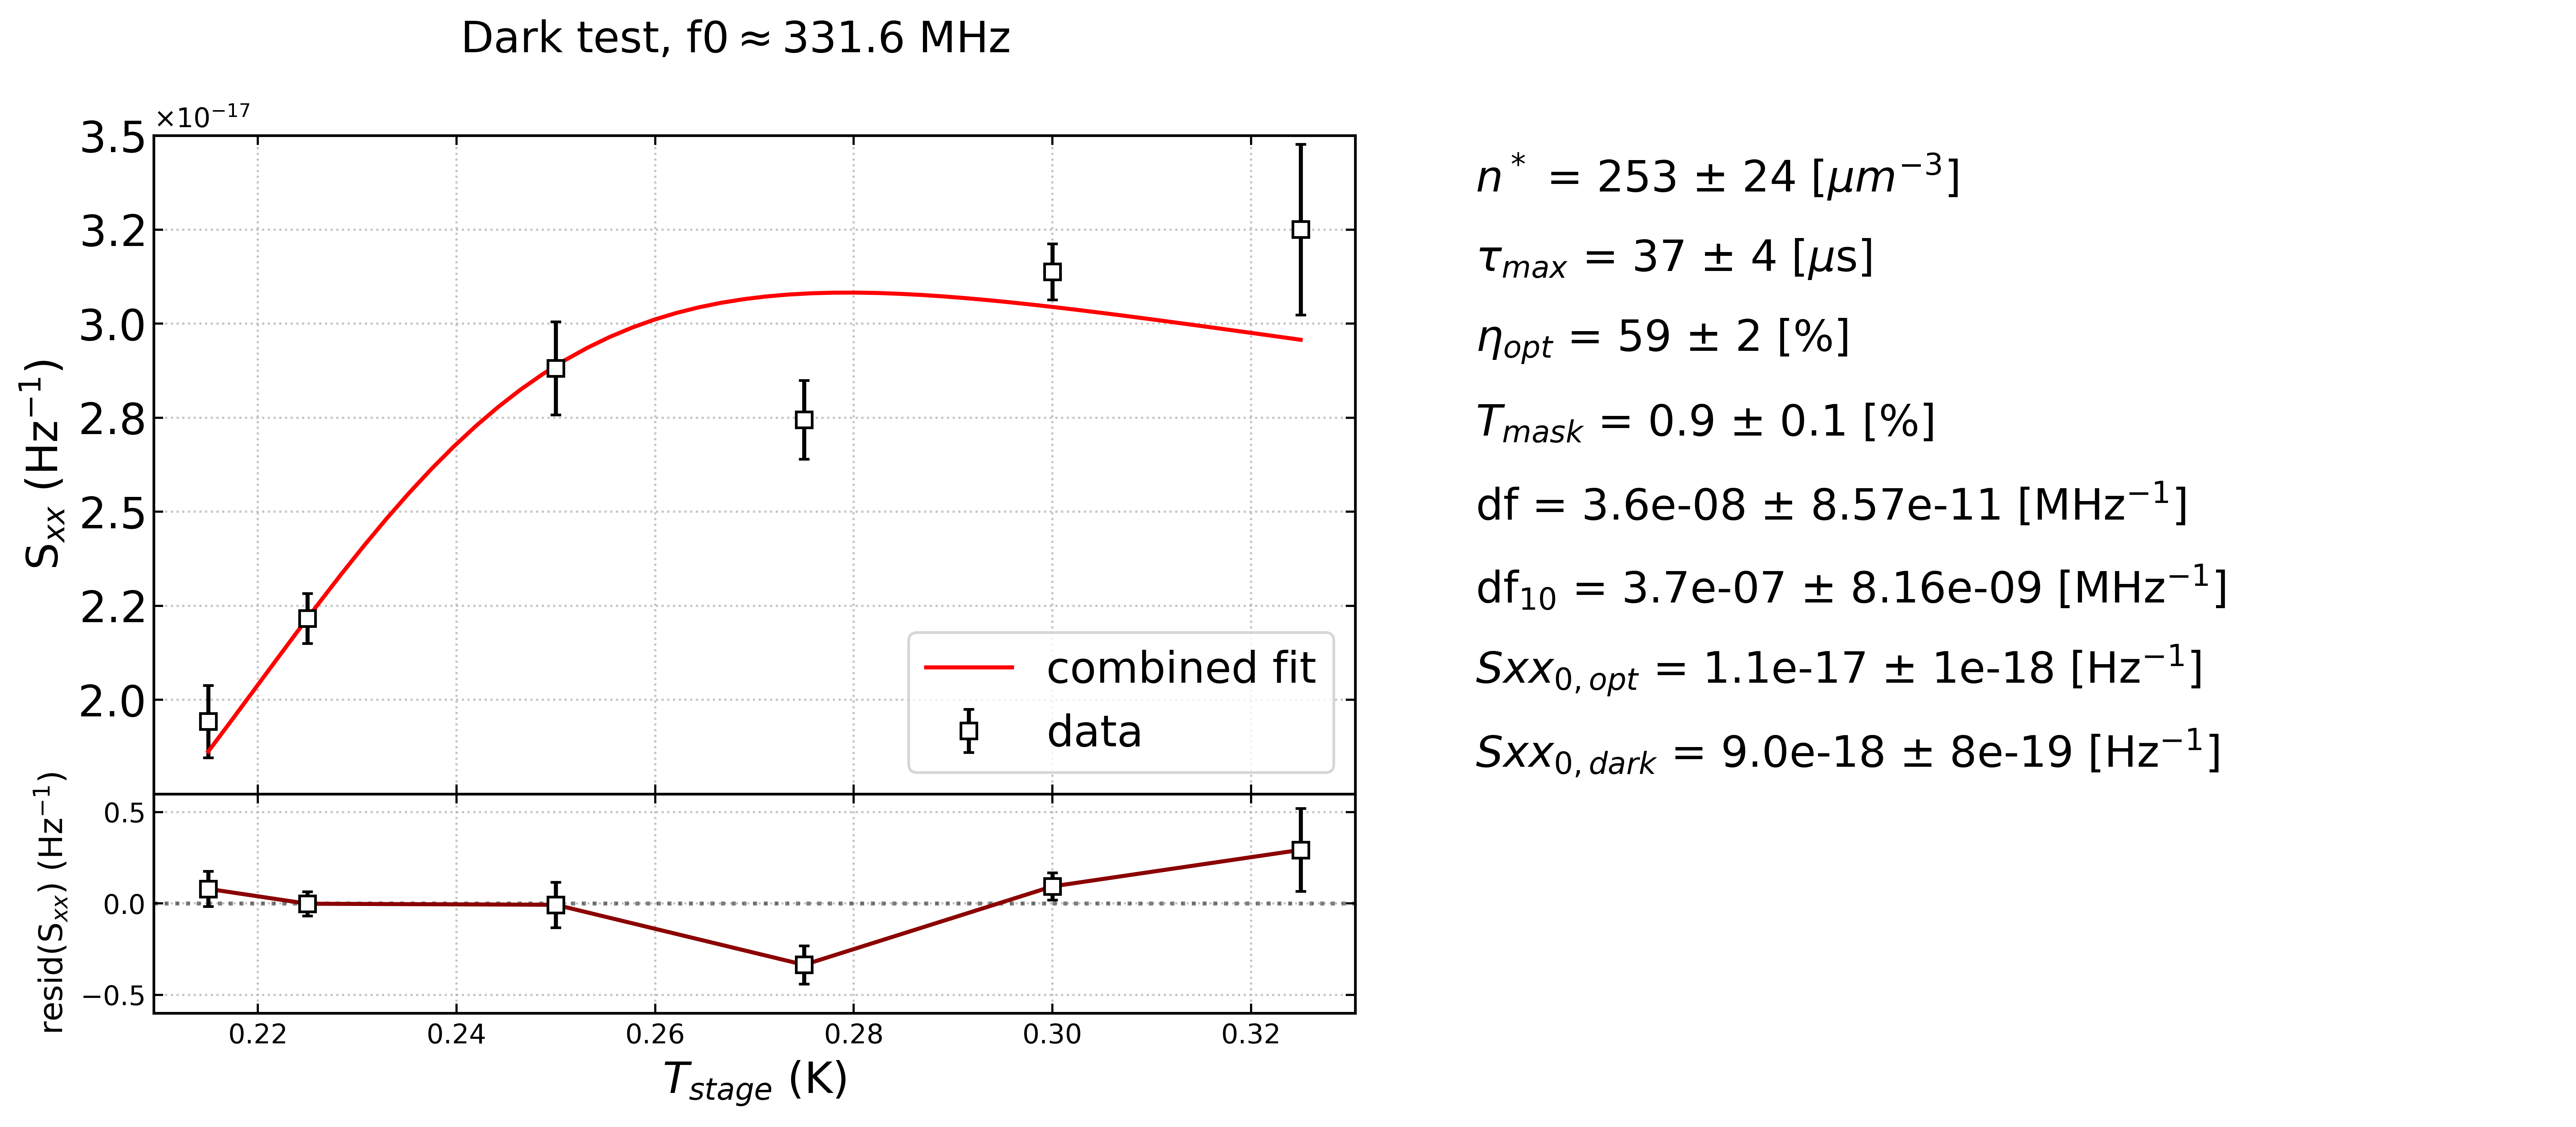

In [18]:
#p2.figure(figsize=(8,6),dpi=512,facecolor=None)
fig2, (p2,p2b) = plt.subplots(2,1,gridspec_kw={'height_ratios':[3, 1]}, sharex=True, figsize=(8,6),dpi=512,facecolor=None)
plt.rc('font', size=16)
p2.errorbar(x=Tstagedarkpts,y=sxxdarkpts,yerr=sxxdarkerr,linestyle=None,fmt='s',markerfacecolor='w',markeredgecolor='k',ecolor='k',label='data')
p2.plot(Tstagefit,sxxdarkfit,'r-',label='combined fit')
p2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
p2.tick_params(axis='both',labelsize=16)
fig2.suptitle(r'Dark test, f0$\approx$331.6 MHz'+'\n',fontsize=16)
p2.legend(loc='lower right',fontsize=16)
p2.set_ylabel(r'S$_{xx}$ (Hz$^{-1}$)',fontsize=16)
p2.set_ylim([1.75e-17,3.5e-17])

the_table = p2.table(cellText=cell_text, loc='right',cellLoc='left',bbox=[1.0, 0, 1, 1])
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)    
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)

p2b.errorbar(x=Tstagedarkpts,y=sxxdarkresid,yerr=sxxdarkerr,linestyle='-',color='darkred',fmt='s',markerfacecolor='w',markeredgecolor='k',ecolor='k',label='data')
p2b.axhline(y=0,color='k',linestyle=':',alpha=0.5)
p2b.set_xlabel(r'$T_{stage}$ (K)',fontsize=16)
p2b.set_ylabel(r'resid(S$_{xx}$) (Hz$^{-1}$)',fontsize=12)
p2b.set_ylim([-0.6e-17,0.6e-17])
p2b.yaxis.offsetText.set_visible(False)
fig2.subplots_adjust(hspace=0)
plt.setp(p2.get_yticklabels()[0], visible=False)

for axe in [p2,p2b]:
    axe.yaxis.set_major_formatter(OOMFormatter(-17, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-17,-17))

if save==True: fig2.savefig('C:\\Users\\Alyssa\\Penn Google Drive\\Penn & NSTRF\\Caltech Devices\\Evap_Devices_Analysis\\evap_devices\\trifitplots\\CD011_res0_Sxx_vs_Tstage_'+plotlabel+'.png')

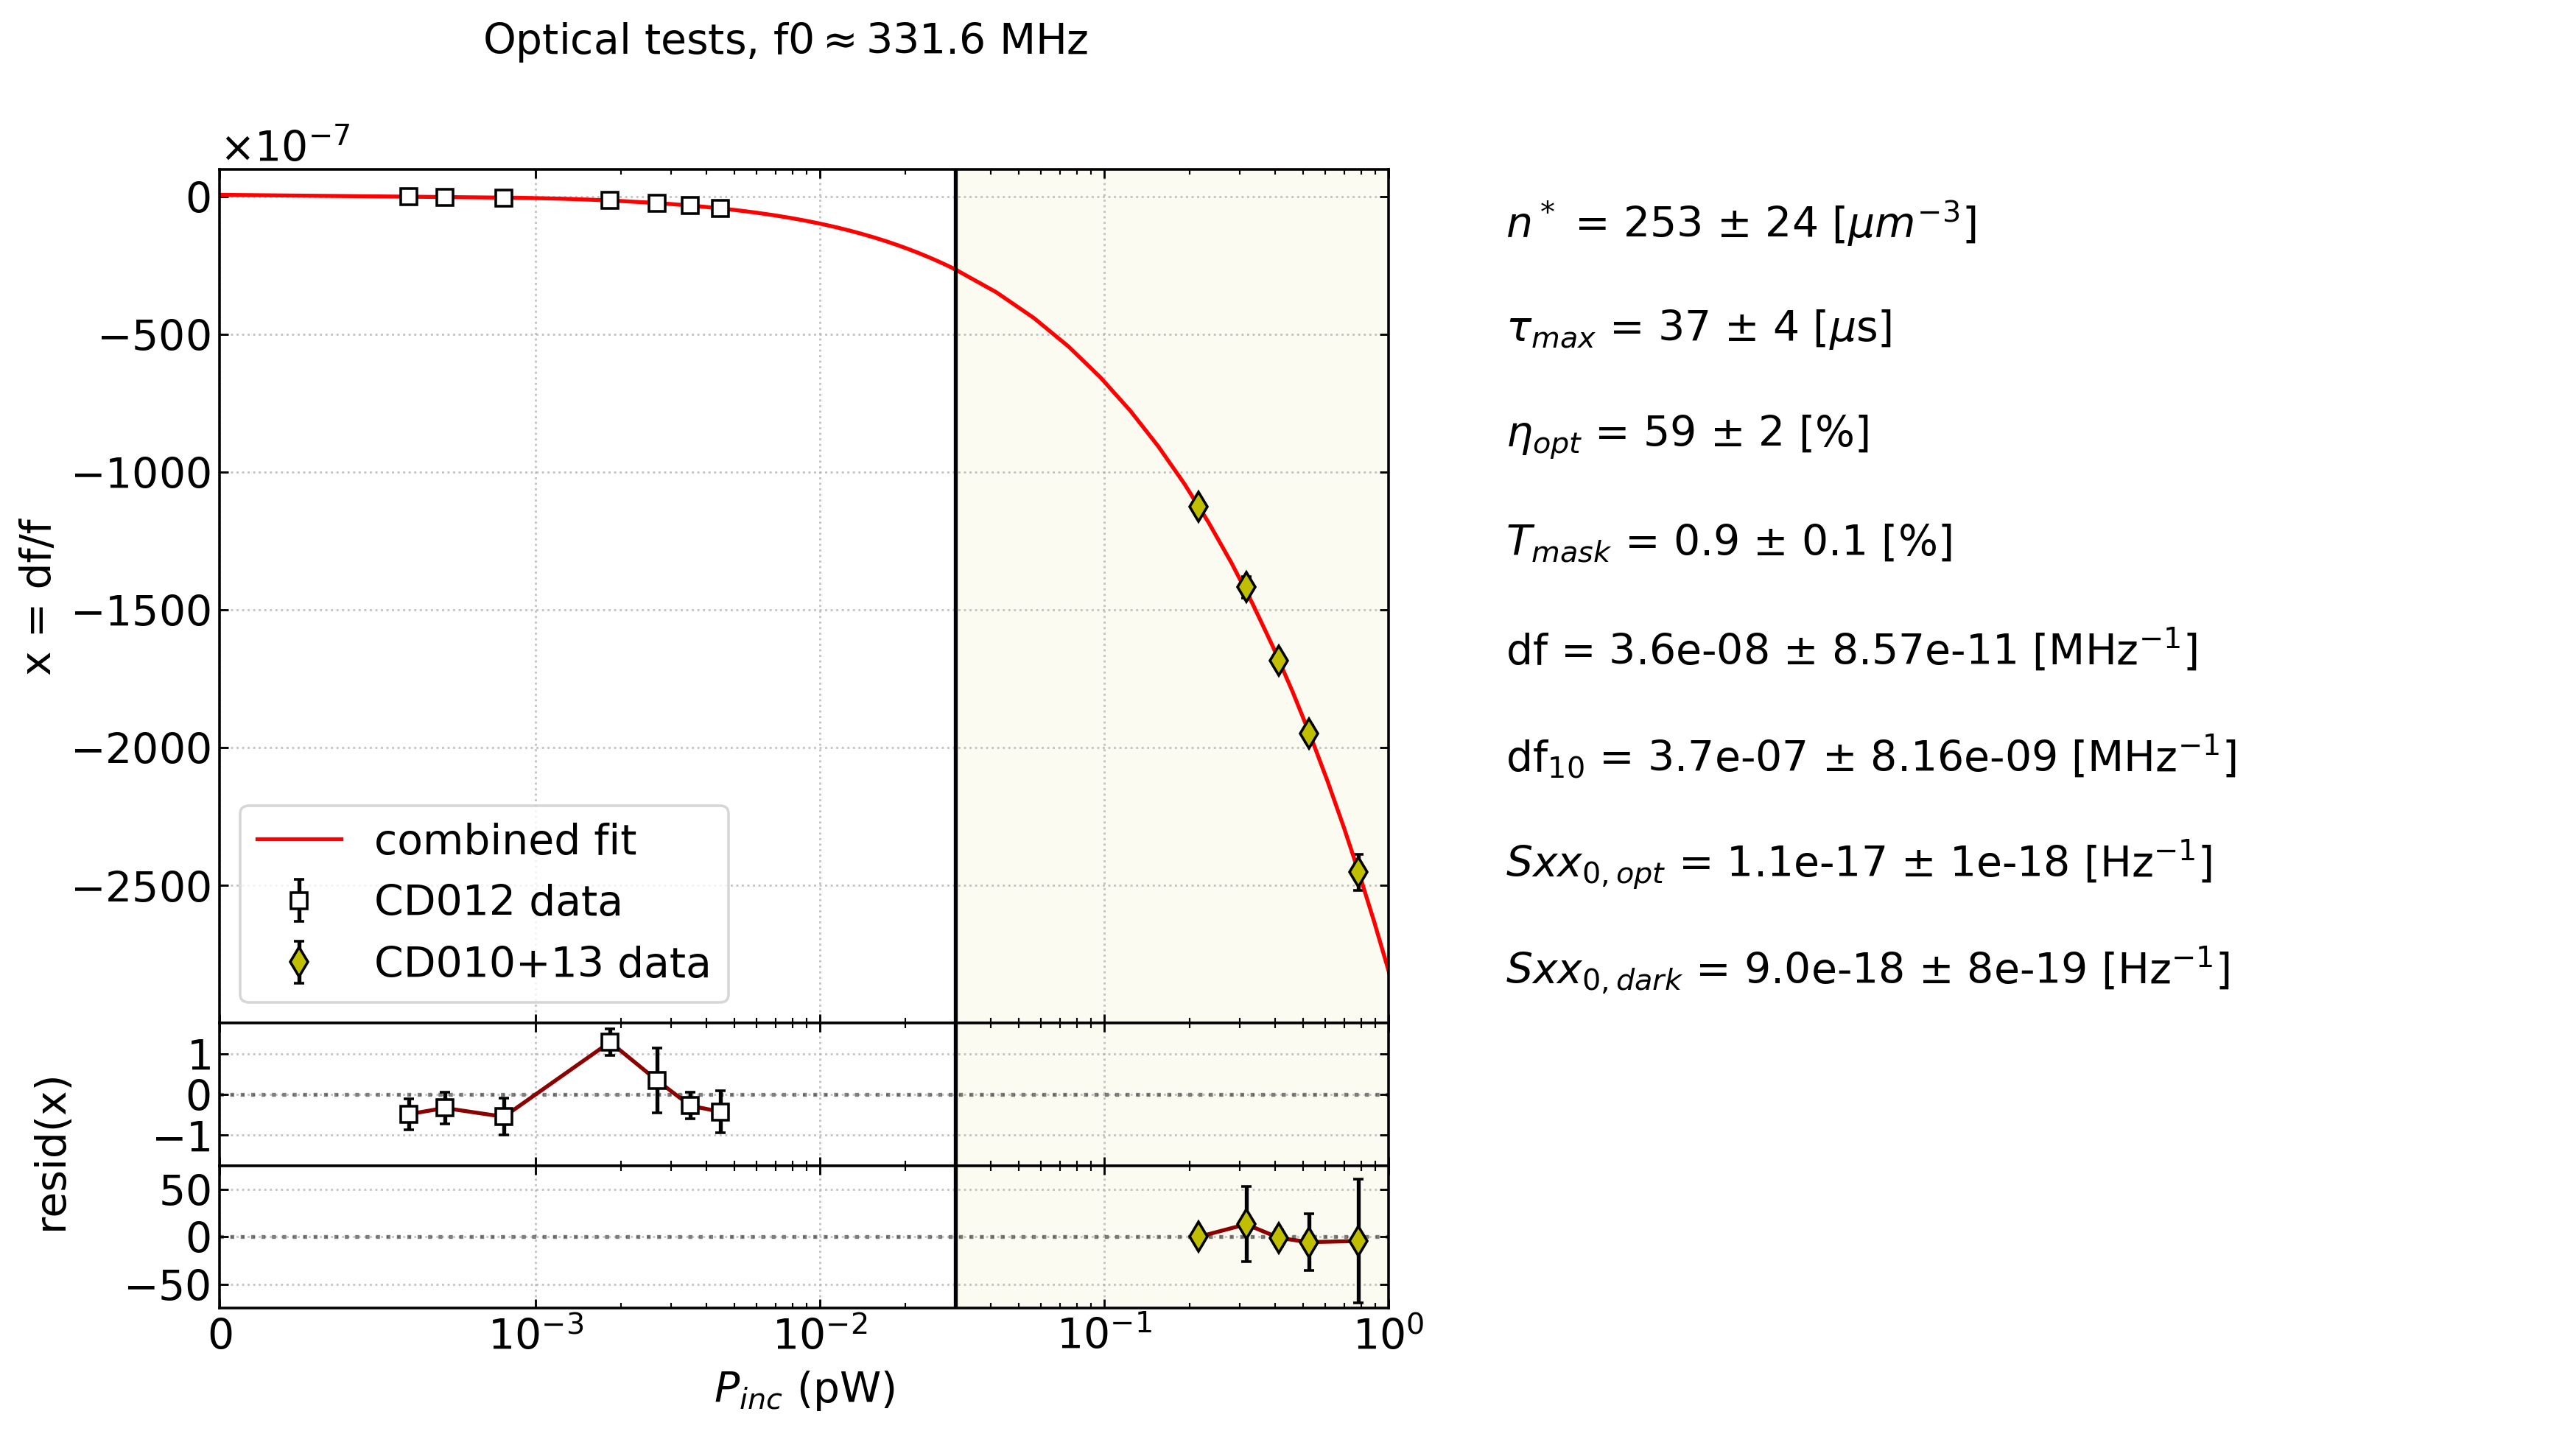

In [36]:
fig2, (p2,p2b,p2c) = plt.subplots(3,1,gridspec_kw={'height_ratios':[3, .5,.5]}, sharex=True, figsize=(8,8),dpi=256,facecolor=None)
plt.rc('font', size=16)
p2.errorbar(x=Pincoptpts.value,y=(xoptpts),yerr=xopterr,linestyle=None,fmt='s',markersize=6,markerfacecolor='w',markeredgecolor='k',ecolor='k',label='CD012 data')
p2.plot(kids.TBB_to_Pinc(TBBfit,trans),(xoptfit),'r-',label='combined fit')
p2.errorbar(x=kids.TBB_to_Pinc(TBBoptpts10).value,y=(xfulloptpts10-xshift),yerr=xfullopterr10,linestyle=None,fmt='d',markersize=8,markerfacecolor='y',markeredgecolor='k',ecolor='k',label='CD010+13 data')
p2.plot(kids.TBB_to_Pinc(TBBfulloptfit,1),(xfulloptfit10-xshift),'r-')#,label='combined fit')

p2.axvline(x=0.03,color='k')
p2.axvspan(0.03, 1, alpha=0.05, color='y')

p2.set_xscale('symlog',linthreshx=1e-3,subsx=[2, 3, 4, 5, 6, 7, 8, 9])
p2.set_xlim([0,1])
p2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
#plt.yscale('symlog',linthreshy=1e-7)
p2.set_ylabel('x = df/f',fontsize=16)
p2.set_ylim([-3e-4,1e-5])
p2.tick_params(axis='both',labelsize=16)
fig2.suptitle(r'Optical tests, f0$\approx$331.6 MHz' + '\n',fontsize=16)
p2.legend(loc='lower left',fontsize=16)

the_table = p2.table(cellText=cell_text, loc='right',cellLoc='left',bbox=[1.0, 0, 1, 1])
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)    
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)

p2b.errorbar(x=Pincoptpts.value,y=xoptresid,yerr=xopterr,linestyle='-',color='darkred',fmt='s',markerfacecolor='w',markersize=6,markeredgecolor='k',ecolor='k',label='data')
p2b.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
p2b.axhline(y=0,color='k',linestyle=':',alpha=0.5)
#p2b.set_ylabel(r'resid(x)',fontsize=16)
p2b.set_ylim([-1.75e-7,1.75e-7])
p2b.axvline(x=0.03,color='k')
p2b.axvspan(0.03, 1, alpha=0.05, color='y')

p2c.errorbar(x=kids.TBB_to_Pinc(TBBoptpts10).value,y=xfulloptresid10,yerr=xfullopterr10,linestyle='-',color='darkred',fmt='d',markersize=8,markerfacecolor='y',markeredgecolor='k',ecolor='k',label='data')
p2c.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
p2c.axhline(y=0,color='k',linestyle=':',alpha=0.5)
p2c.axvline(x=0.03,color='k')
p2c.axvspan(0.03, 1, alpha=0.05, color='y')


p2c.set_xlabel(r'$P_{inc}$ (pW)',fontsize=16)
fig2.text(0,0.23,'resid(x)',fontsize=16,va='center', rotation='vertical')
p2c.set_ylim([-7.5e-6,7.5e-6])
#p2c.yaxis.set_label_position("right")
#p2c.yaxis.tick_right()
fig2.subplots_adjust(hspace=0)
plt.setp(p2.get_yticklabels()[0], visible=False)

for axe in [p2,p2b,p2c]:
    axe.yaxis.set_major_formatter(OOMFormatter(-7,"%1.0f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-7,-7))

p2b.yaxis.offsetText.set_visible(False)
p2c.yaxis.offsetText.set_visible(False)

if save==True: plt.savefig('C:\\Users\\Alyssa\\Penn Google Drive\\Penn & NSTRF\\Caltech Devices\\Evap_Devices_Analysis\\evap_devices\\trifitplots\\CD012_res0_x_vs_Pinc_'+plotlabel+'.png')

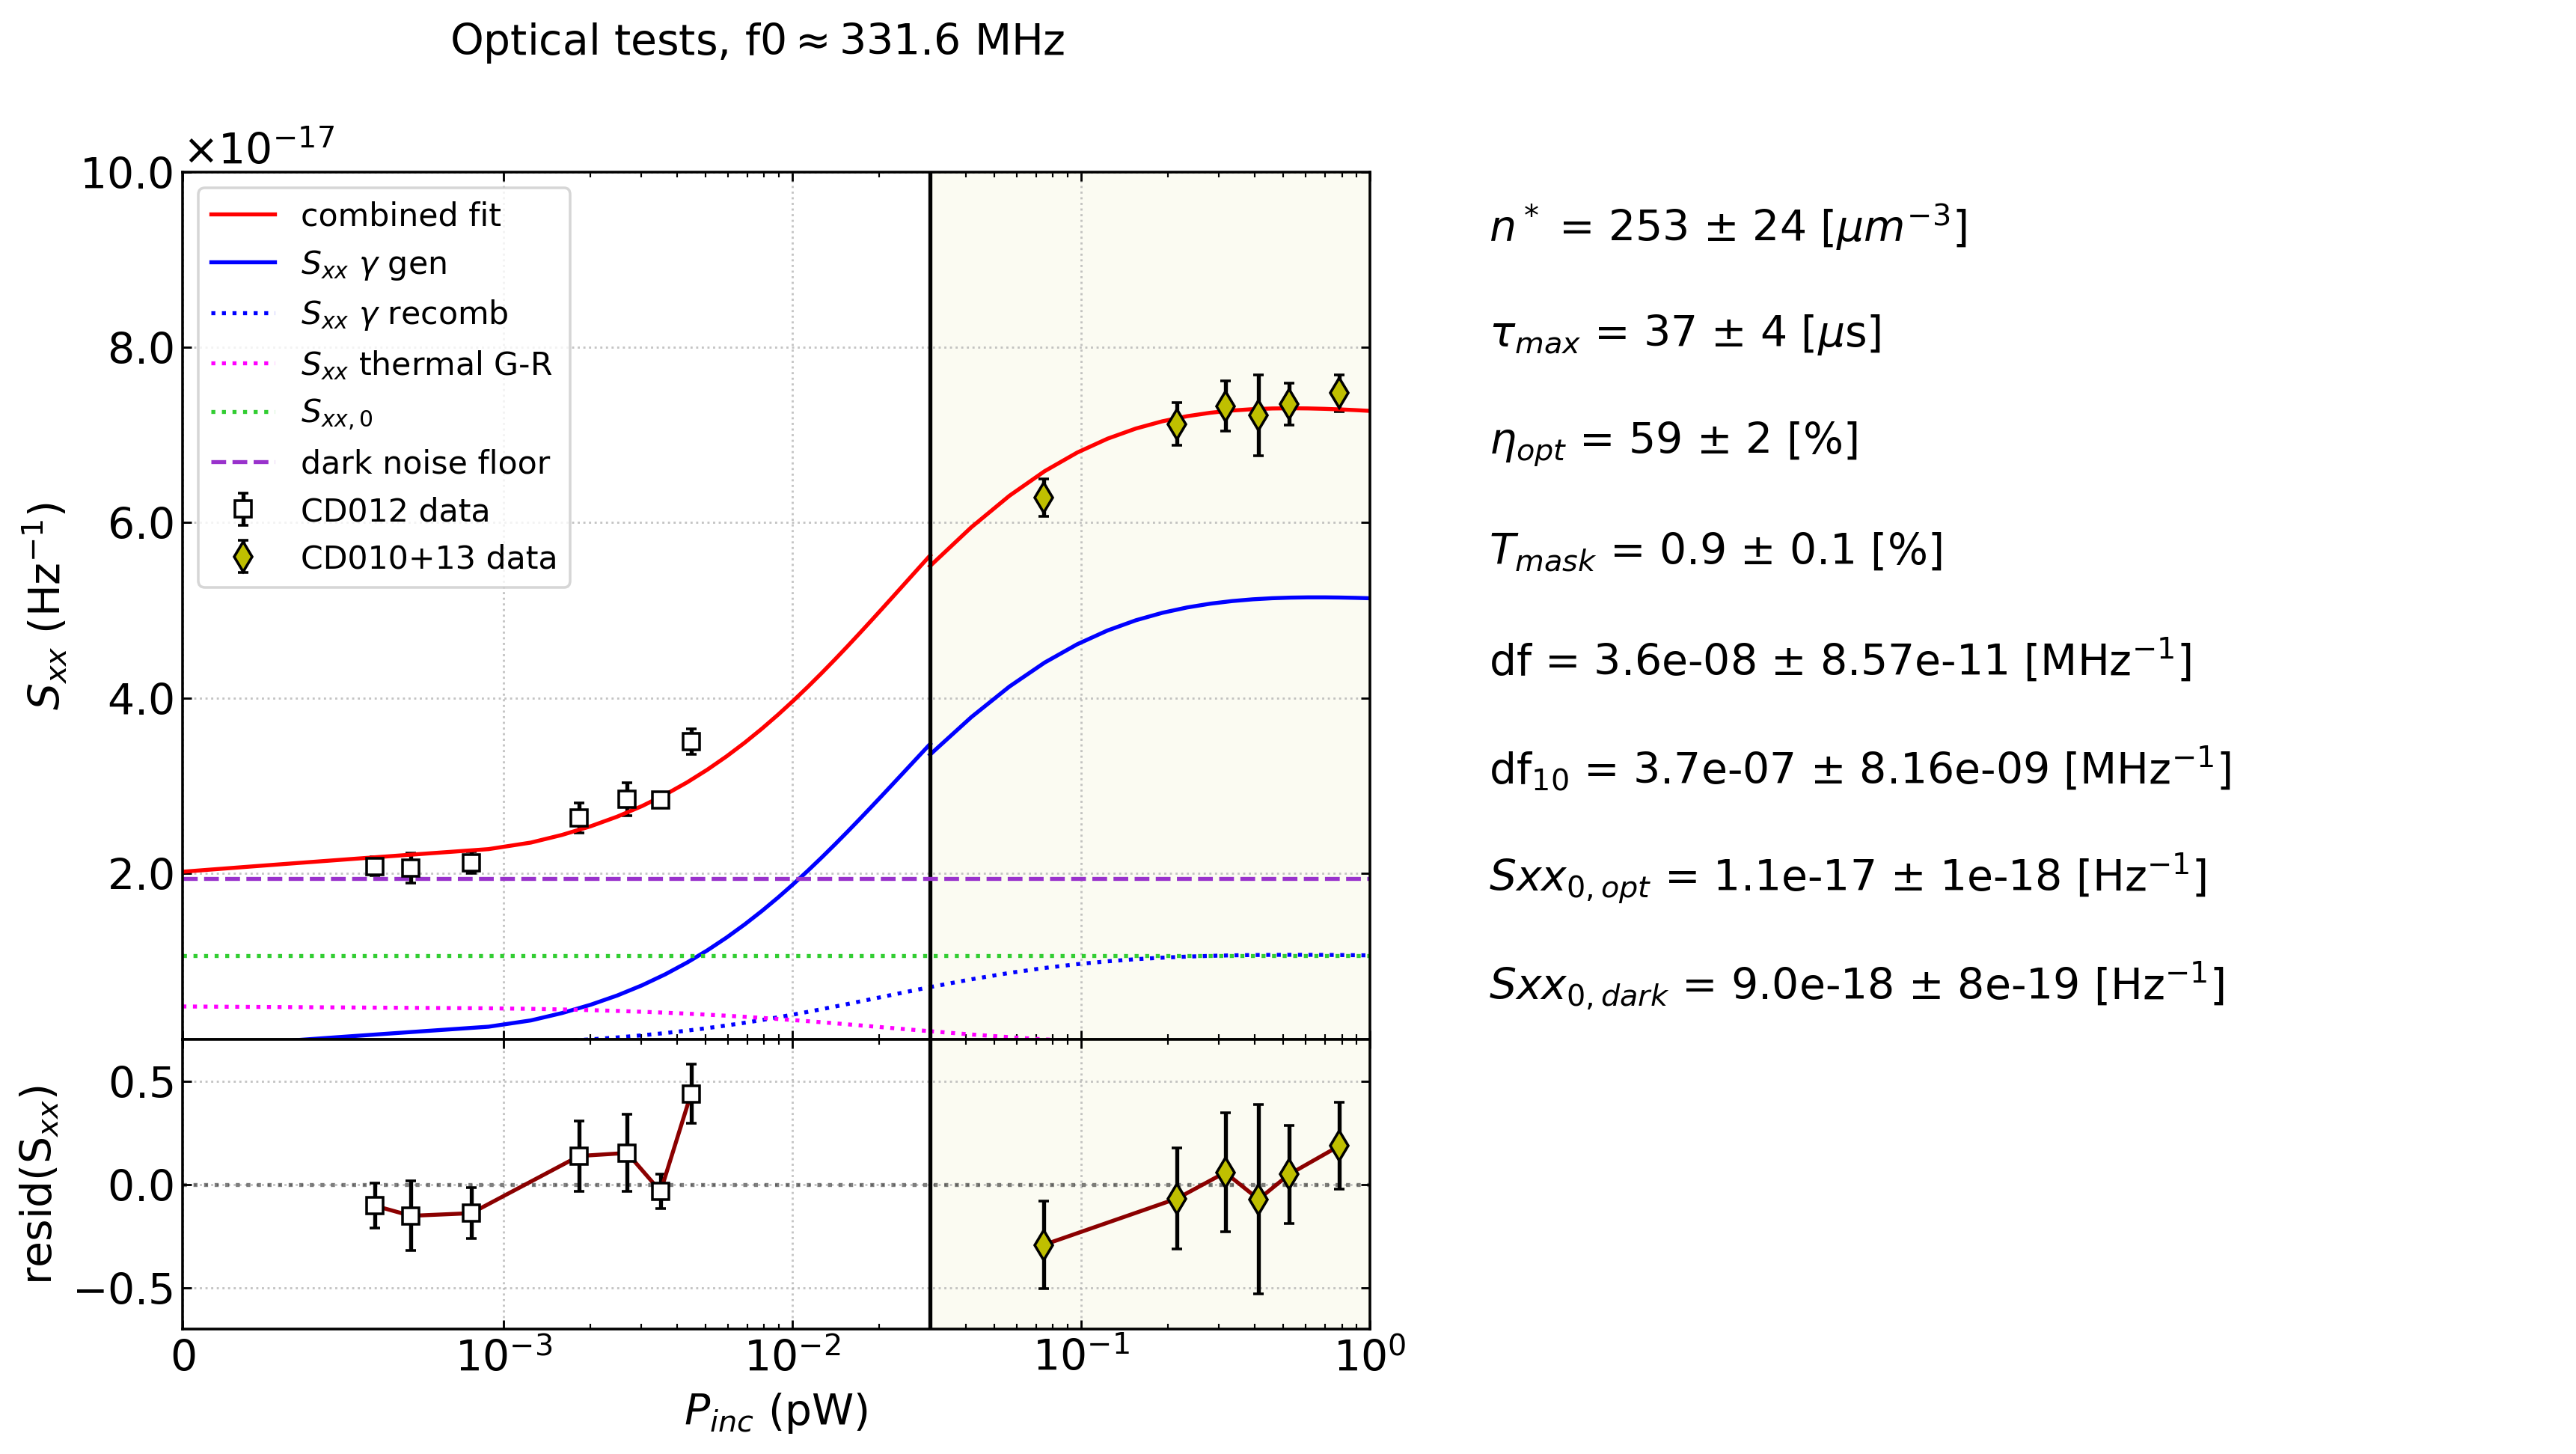

In [34]:
fig2, (p2,p2b) = plt.subplots(2,1,gridspec_kw={'height_ratios':[3, 1]}, sharex=True, figsize=(8,8),dpi=256,facecolor=None)
plt.rc('font', size=16)
p2.errorbar(x=Pincoptpts.value,y=sxxoptpts,yerr=sxxopterr,linestyle=None,fmt='s',markersize=6,markerfacecolor='w',markeredgecolor='k',ecolor='k',label='CD012 data')
p2.plot(kids.TBB_to_Pinc(TBBfit,trans),sxxoptfit,'r-',linewidth=1.5,label='combined fit')
p2.plot(kids.TBB_to_Pinc(TBBfit,trans),SxxGphoton,linestyle='-',linewidth=1.5,color='b',label=r'$S_{xx}$ $\gamma$ gen')
p2.plot(kids.TBB_to_Pinc(TBBfit,trans),SxxRphoton,linestyle=':',linewidth=1.5,color='b',label=r'$S_{xx}$ $\gamma$ recomb')
p2.plot(kids.TBB_to_Pinc(TBBfit,trans),SxxGRth,linestyle=':',linewidth=1.5,color='magenta',label=r'$S_{xx}$ thermal G-R')

p2.errorbar(x=Pincfulloptpts.value,y=sxxfulloptpts,yerr=sxxfullopterr,linestyle=None,fmt='d',markersize=8,markerfacecolor='y',markeredgecolor='k',ecolor='k',label='CD010+13 data')
p2.plot(kids.TBB_to_Pinc(TBBfulloptfit,trans=1),sxxfulloptfit,'r-')#,label='combined fit')
p2.plot(kids.TBB_to_Pinc(TBBfulloptfit,trans=1),SxxGfullphoton,linestyle='-',linewidth=1.5,color='b')#,label=r'$S_{xx}$ photon generation')
p2.plot(kids.TBB_to_Pinc(TBBfulloptfit,trans=1),SxxRfullphoton,linestyle=':',linewidth=1.5,color='b')#,label=r'$S_{xx}$ photon recombination')
p2.plot(kids.TBB_to_Pinc(TBBfulloptfit,trans=1),SxxGRthfull,linestyle=':',linewidth=1.5,color='magenta')#,label=r'$S_{xx}$ thermal G-R')

p2.axvline(x=0.03,color='k')
p2.axvspan(0.03, 1, alpha=0.05, color='y')
p2.axhline(y=Sxx0opt_fit,linestyle=':',color='limegreen',label=r'$S_{xx,0}$')

#plt.errorbar(x=0,y=sxxdarkpts[0],yerr=sxxdarkerr[0],fmt='o',markersize=5,markerfacecolor='k',markeredgecolor='k',ecolor='k',label='dark noise')
p2.axhline(y=sxxdarkpts[0],color='darkorchid',linestyle='--',label='dark noise floor')

p2.ticklabel_format(axis='y',style='sci',scilimits=(-17,-17))

p2.set_xscale('symlog',linthreshx=1e-3,subsx=[2, 3, 4, 5, 6, 7, 8, 9])
p2.set_xlim([0,1])
p2.set_ylabel(r'$S_{xx}$ (Hz$^{-1}$)',fontsize=16)
p2.set_ylim([.1e-17,10e-17])
p2.tick_params(axis='both',labelsize=16)
fig2.suptitle(r'Optical tests, f0$\approx$331.6 MHz'+'\n',fontsize=16)
p2.legend(loc='upper left',fontsize=12)#,bbox_to_anchor=(1.03, 1.03))

the_table = p2.table(cellText=cell_text, loc='right',cellLoc='left',bbox=[1.0, 0, 1, 1])
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)    
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)
    

p2b.errorbar(x=Pincoptpts.value,y=sxxoptresid,yerr=sxxopterr,linestyle='-',color='darkred',fmt='s',markersize=6,markerfacecolor='w',markeredgecolor='k',ecolor='k',label='data')
p2b.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
p2b.axhline(y=0,color='k',linestyle=':',alpha=0.5)
#p2b.set_ylabel(r'resid(x)',fontsize=16)
#p2b.set_ylim([-1.75e-7,1.75e-7])
p2b.axvline(x=0.03,color='k')
p2b.axvspan(0.03, 1, alpha=0.05, color='y')

p2b.errorbar(x=Pincfulloptpts.value,y=sxxfulloptresid,yerr=sxxfullopterr,linestyle='-',color='darkred',fmt='d',markersize=8,markerfacecolor='y',markeredgecolor='k',ecolor='k',label='data')

p2b.set_xlabel(r'$P_{inc}$ (pW)',fontsize=16)
p2b.set_ylabel(r'resid(S$_{xx}$)',fontsize=16)
p2b.set_ylim([-.7e-17,.7e-17])
fig2.subplots_adjust(hspace=0)
plt.setp(p2.get_yticklabels()[0], visible=False)

for axe in [p2,p2b]:
    axe.yaxis.set_major_formatter(OOMFormatter(-17,"%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-17,-17))

p2b.yaxis.offsetText.set_visible(False)

if save==True: plt.savefig('C:\\Users\\Alyssa\\Penn Google Drive\\Penn & NSTRF\\Caltech Devices\\Evap_Devices_Analysis\\evap_devices\\trifitplots\\CD012_res0_sxx_vs_Pinc_'+plotlabel+'.png')

(5, 10)

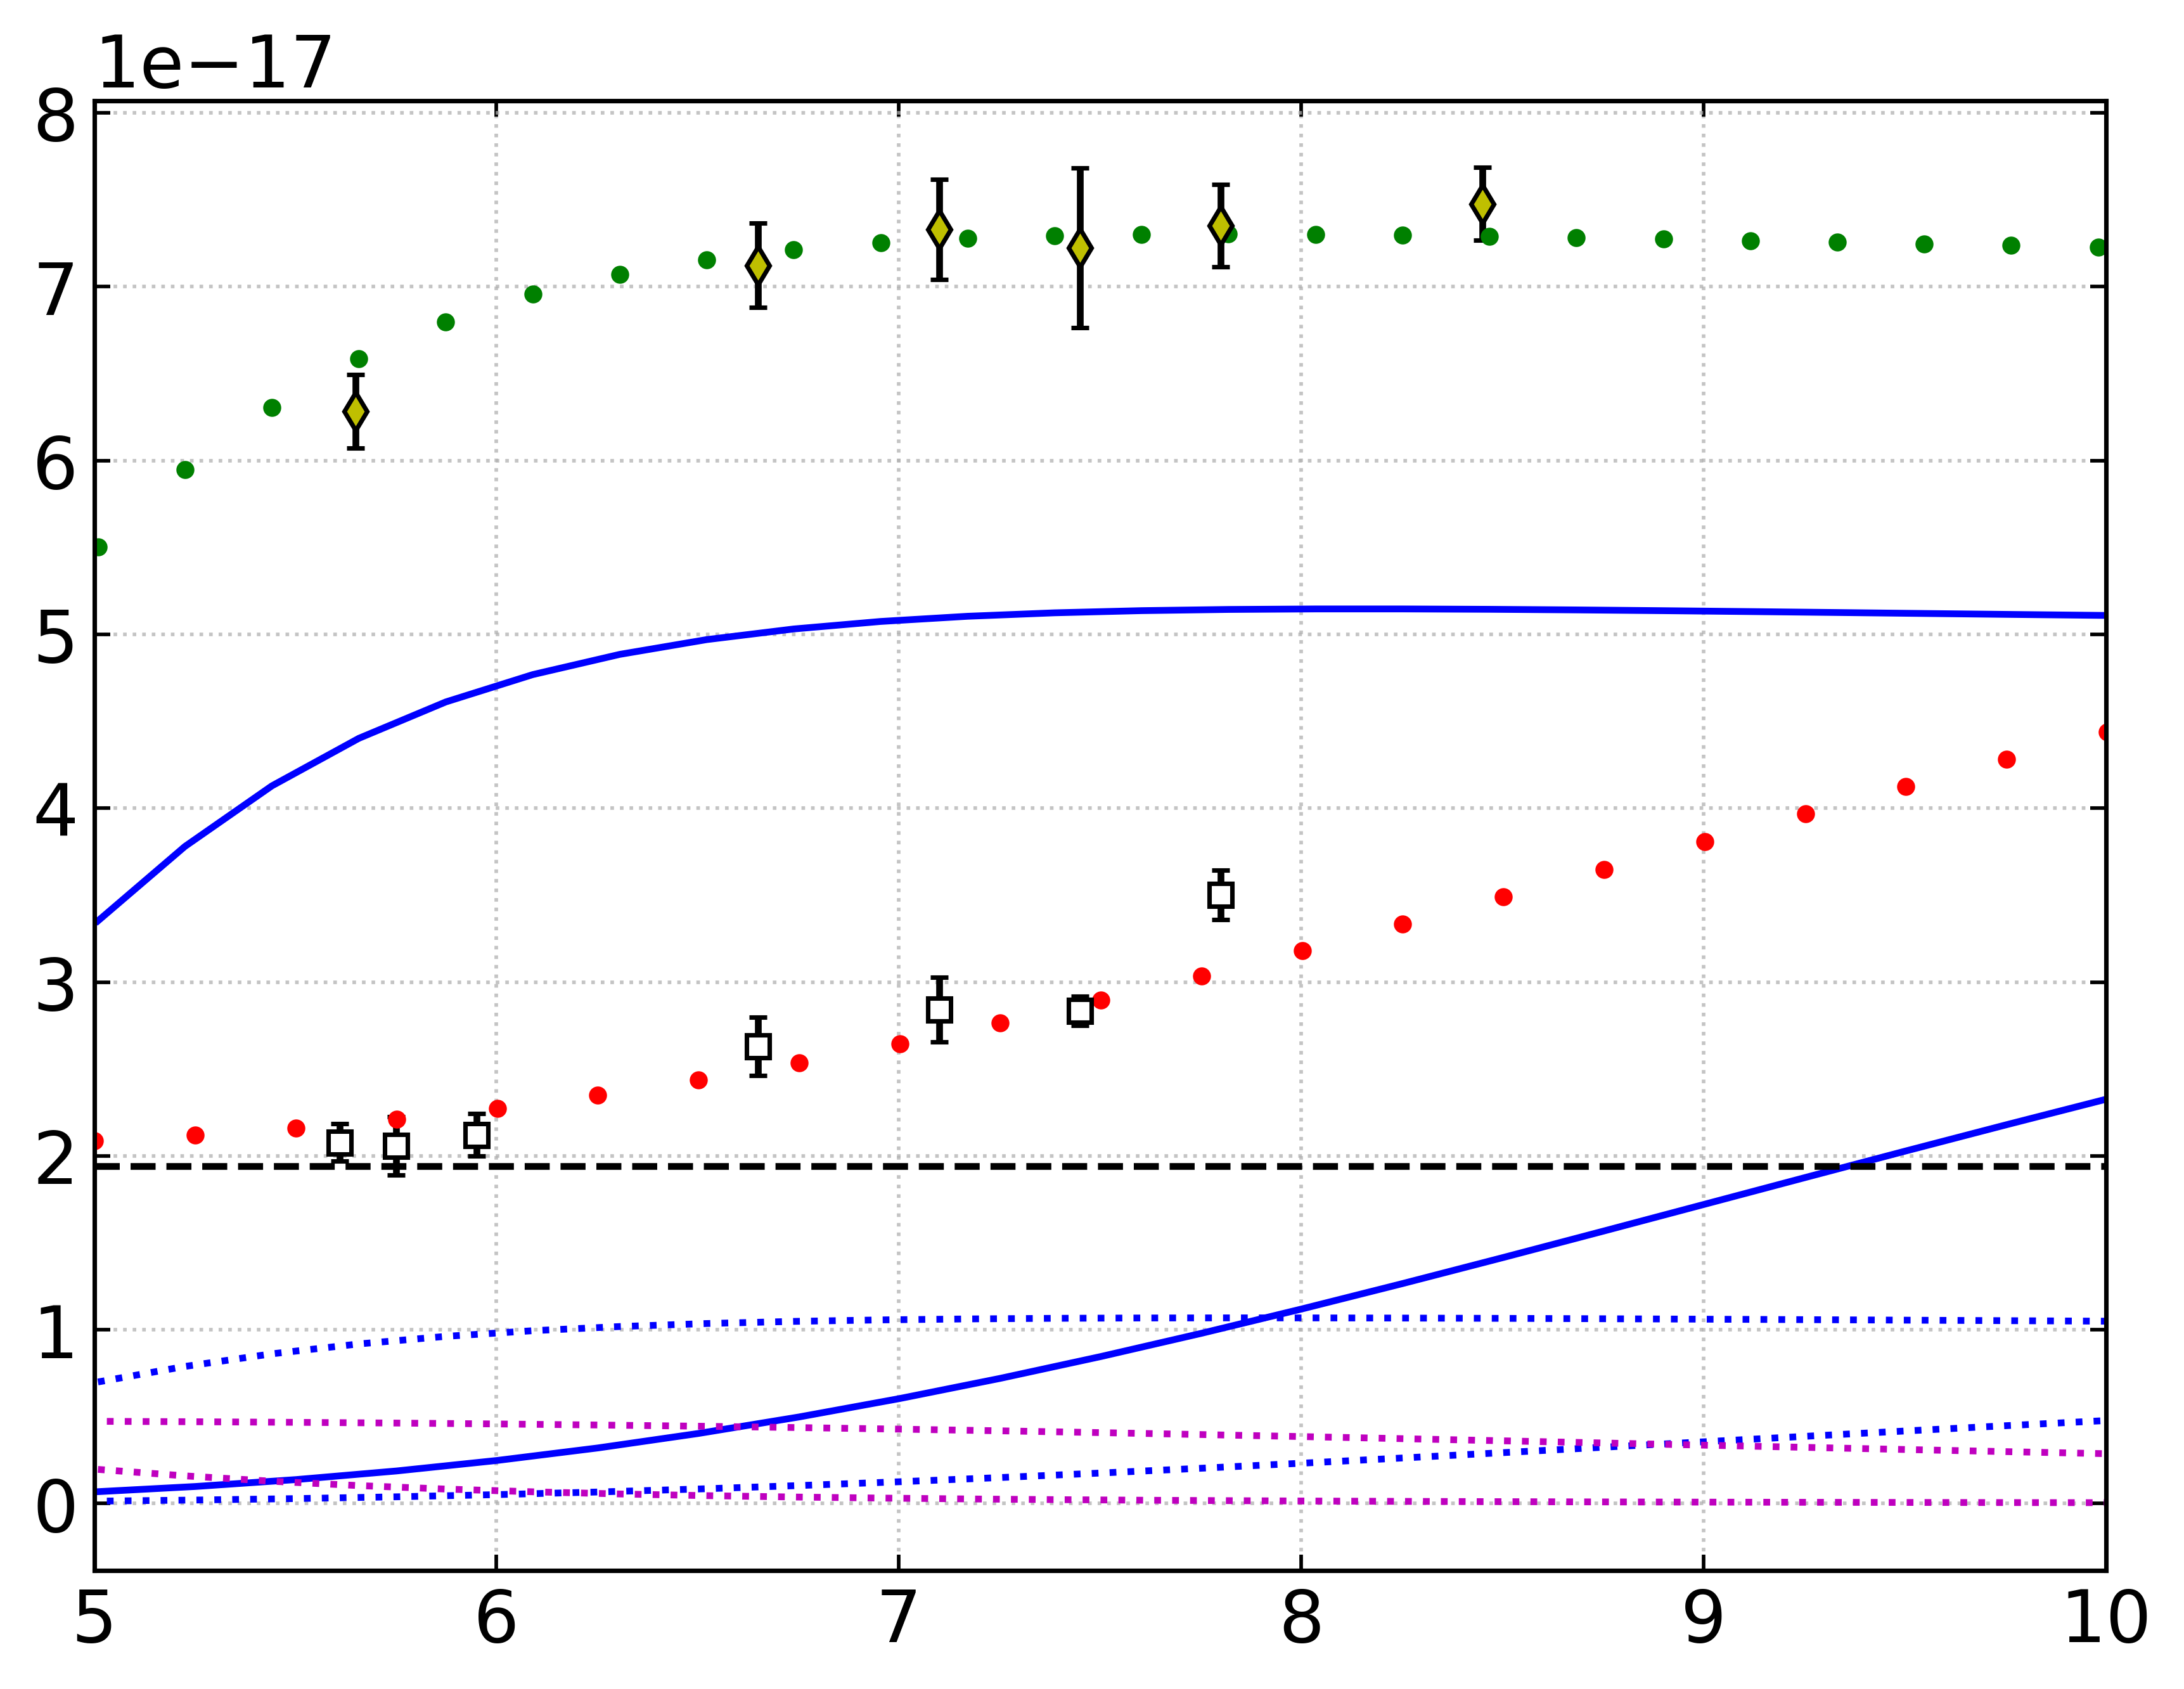

In [21]:
plt.figure(figsize=(8,6),dpi=512,facecolor=None)
plt.errorbar(x=TBBoptpts,y=sxxoptpts,yerr=sxxopterr,linestyle=None,fmt='s',markersize=5,markerfacecolor='w',markeredgecolor='k',ecolor='k',label='CD012 data')
plt.plot(TBBfit,sxxoptfit,'r.',linewidth=1.5,label='combined fit')
plt.plot(TBBfit,SxxGphoton,linestyle='-',linewidth=1.5,color='b',label=r'$S_{xx}$ $\gamma$ gen')
plt.plot(TBBfit,SxxRphoton,linestyle=':',linewidth=1.5,color='b',label=r'$S_{xx}$ $\gamma$ recomb')
plt.plot(TBBfit,SxxGRth,linestyle=':',linewidth=1.5,color='m',label=r'$S_{xx}$ thermal G-R')

plt.errorbar(x=TBBfulloptpts,y=sxxfulloptpts,yerr=sxxfullopterr,linestyle=None,fmt='d',markerfacecolor='y',markeredgecolor='k',ecolor='k',label='CD010+13 data')
plt.plot(TBBfulloptfit,sxxfulloptfit,'g.')#,label='combined fit')
plt.plot(TBBfulloptfit,SxxGfullphoton,linestyle='-',linewidth=1.5,color='b')#,label=r'$S_{xx}$ photon generation')
plt.plot(TBBfulloptfit,SxxRfullphoton,linestyle=':',linewidth=1.5,color='b')#,label=r'$S_{xx}$ photon recombination')
plt.plot(TBBfulloptfit,SxxGRthfull,linestyle=':',linewidth=1.5,color='m')#,label=r'$S_{xx}$ thermal G-R')

#plt.errorbar(x=0,y=sxxdarkpts[0],yerr=sxxdarkerr[0],fmt='o',markersize=5,markerfacecolor='k',markeredgecolor='k',ecolor='k',label='dark noise')
plt.axhline(y=sxxdarkpts[0],color='k',linestyle='--',label='dark noise floor')
plt.xlim([5,10])

In [41]:
# Estimate NEP = sqrt(Sxx)/(dx/dPabs); Pabs = eta_opt*Pinc

# with T_mask = 1, T_BB = 5.75 K gives P_abs = 0.025 pW
T_BB_NEP = 5.1*u.K
print('Pabs = '+str(eta_opt_fit*kids.TBB_to_Pinc(T_BB_NEP,trans=1)))
sxx_NEP = np.power(u.Hz,-1)*sxxoptfunc(T_BB_NEP,n_star_fit,tau_max_fit,1,eta_opt_fit,Sxx0opt_fit)
print('Sxx(Pabs) = ' + str(sxx_NEP))
R_calc = kids.dxdPabs(alpha,f,Tstage,Tc,T_BB_NEP,V,n_star_fit*np.power(u.micron,-3),tau_max_fit*u.microsecond,eta_pb,eta_opt_fit,1)
print('R = ' + str(R_calc))
NEP_meas = np.sqrt(sxx_NEP)/R_calc
print('NEP_meas = ' + str(NEP_meas))
NEP_dev = np.sqrt(sxx_NEP-Sxx0opt_fit*sxx_NEP.unit-kids.Sxx_GR_th(alpha,f,Tstage,Tc,T_BB_NEP,V,n_star_fit,tau_max_fit,eta_pb,nu_opt,eta_opt_fit,1,N0))/R_calc
print('NEP_dev = ' + str(NEP_dev))

Pabs = 0.020491845411697875 pW
Sxx(Pabs) = 5.698741661982549e-17 1 / Hz
R = 731533929.0573922 1 / W
NEP_meas = 1.0319413406141867e-17 W / Hz(1/2)
NEP_dev = 9.12985196445889e-18 W / Hz(1/2)


In [23]:
f0optpts

[331639972.04043347,
 331639934.1989284,
 331639856.2702586,
 331639571.42604446,
 331639228.45990777,
 331638914.5982192,
 331638570.8120308]

In [24]:
n_star_fit

252.58257254085981

In [25]:
n_star_fit
tau_max_fit

37.34601516402914

In [26]:
n_star_fit

252.58257254085981

In [27]:
tau_max_fit

37.34601516402914

In [28]:
Tc 

<Quantity 1.39 K>

In [29]:
R1 = np.power(n_star_fit*tau_max_fit,-1)

In [30]:
R1

0.00010601134597734028

In [31]:
tau_0 = 438e-9*u.second

In [32]:
R2 = (np.power(2*kids.delta0(Tc),2)/(2*N0*tau_0*np.power(c.k_B*Tc,3))).to(R1.unit)

AttributeError: 'numpy.float64' object has no attribute 'unit'

In [ ]:
R2

In [ ]:
R1/R2

In [ ]:
1./(R2*tau_max_fit)

In [ ]:
# what do good detectors look like???
alpha = 0.73*u.dimensionless_unscaled
f = 331.6*u.MHz
Tstage = 0.215*u.K
Tc = 1.1*u.K
TBB_0 = 6.0*u.K
V = 38*1.5*0.8*np.power(u.micron,3) # volume w/20nm film is 38um3, multiply by 1.5 for ~30nm film, minus 20% for overetching trace width
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

tau_max = 60*u.microsecond
eta_opt = 0.6
n_star = 100*np.power(u.micron,-3)#1./(R2*tau_max_fit)

TBB = TBBfit
trans = 0.03

In [ ]:
Sxx_m1 = kids.Sxx(alpha,f,Tstage,Tc,TBB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt,trans,N0)

In [ ]:
plt.errorbar(x=kids.TBB_to_Pinc(TBBoptpts,trans).value,y=sxxoptpts,yerr=sxxopterr,linestyle=None,fmt='s',markerfacecolor='w',markeredgecolor='k',ecolor='k',label='data')
plt.plot(kids.TBB_to_Pinc(TBB,trans),Sxx_m1,'g:')

In [ ]:
TBBoptpts